In [1]:
library('tidyverse')
library('dplyr')
library('forcats')
library('readr')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
movie_data = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-03-09/movies.csv',)

movie_data |> head(3)

Rows: 1794 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (24): imdb, title, test, clean_test, binary, domgross, intgross, code, d...
dbl  (7): year, budget, budget_2013, period_code, decade_code, metascore, im...
num  (1): imdb_votes
lgl  (2): response, error

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,⋯,director,released,actors,genre,awards,runtime,type,poster,imdb_votes,error
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>
2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,1.3e+07,25682380,42195766,2013FAIL,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,4.5e+07,13414714,40868994,2012PASS,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,2.0e+07,53107035,158607035,2013FAIL,⋯,Steve McQueen,08 Nov 2013,"Chiwetel Ejiofor, Dwight Henry, Dickie Gravois, Bryan Batt","Biography, Drama, History",Won 3 Oscars. Another 131 wins & 137 nominations.,134 min,movie,http://ia.media-imdb.com/images/M/MV5BMjExMTEzODkyN15BMl5BanBnXkFtZTcwNTU4NTc4OQ@@._V1_SX300.jpg,143446,NA


In [13]:
unique(movie_data$test)

[1] "notalk"           "ok-disagree"      "notalk-disagree"  "men"             
 [5] "ok"               "nowomen-disagree" "dubious-disagree" "men-disagree"    
 [9] "dubious"          "nowomen"

In [12]:
unique(movie_data$clean_test)

[1] "notalk"  "ok"      "men"     "nowomen" "dubious"

The **Bechdel Test** is used to assess films based on their representation and portrayal of women. To pass the Bechdel test, movie must meet the following 3 criteria:

    1) Have at least two women,
    2) Who talk to each other,
    3) About something other than men
    
In this dataset, the variables `test` and `clean_test` in the above dataset refer to the outcomes of the Bechdel Test and whether a movie passes the Bechdel Test, respectively. The possible values for each variable are shown above.

*Let's assess the Bechdel Test outcomes for movies created in 2010.*

In [4]:
movie_data_filtered = movie_data |> 
    filter(year == 2010) 

movie_data_filtered |> head(3)

year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,⋯,director,released,actors,genre,awards,runtime,type,poster,imdb_votes,error
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>
2010,tt1542344,127 Hours,dubious-disagree,dubious,FAIL,1.8e+07,18335230,60735230,2010FAIL,⋯,Danny Boyle,28 Jan 2011,"James Franco, Kate Mara, Amber Tamblyn, Sean Bott","Adventure, Biography, Drama",Nominated for 6 Oscars. Another 15 wins & 83 nominations.,94 min,movie,http://ia.media-imdb.com/images/M/MV5BMTc2NjMzOTE3Ml5BMl5BanBnXkFtZTcwMDE0OTc5Mw@@._V1_SX300.jpg,208624,NA
2010,tt1014759,Alice in Wonderland,ok,ok,PASS,2.0e+08,334191110,1024391110,2010PASS,⋯,Tim Burton,05 Mar 2010,"Johnny Depp, Mia Wasikowska, Helena Bonham Carter, Anne Hathaway","Adventure, Family, Fantasy",Won 2 Oscars. Another 20 wins & 43 nominations.,108 min,movie,http://ia.media-imdb.com/images/M/MV5BMTMwNjAxMTc0Nl5BMl5BanBnXkFtZTcwODc3ODk5Mg@@._V1_SX300.jpg,227332,NA
2010,tt1313092,Animal Kingdom,notalk,notalk,FAIL,4.2e+06,1044039,8078683,2010FAIL,⋯,David Michôd,03 Jun 2010,"James Frecheville, Bryce Lindemann, Paul Smits, Jacki Weaver","Crime, Drama, Thriller",Nominated for 1 Oscar. Another 36 wins & 36 nominations.,113 min,movie,http://ia.media-imdb.com/images/M/MV5BMTQ2NjcwNjE4NV5BMl5BanBnXkFtZTcwNDU2NDg1Mw@@._V1_SX300.jpg,35924,NA


In [5]:
movie_data_filtered = movie_data_filtered |>
    mutate(clean_test = as.factor(clean_test))

movie_data_filtered |> count(clean_test)

clean_test,n
<fct>,<int>
dubious,13
men,9
notalk,33
nowomen,13
ok,61


In [6]:
movie_data_filtered = movie_data_filtered |>
    mutate(outcomes_sorted = clean_test %>% fct_infreq()) 

levels(movie_data_filtered$outcomes_sorted)

[1] "ok"      "notalk"  "dubious" "nowomen" "men"

In [7]:
count_data = movie_data_filtered |>
  group_by(outcomes_sorted) |>
  summarise(count = n())

total_count = sum(count_data$count)

count_data = count_data |>
  add_row(outcomes_sorted = "total", count = total_count)

count_data

outcomes_sorted,count
<chr>,<int>
ok,61
notalk,33
dubious,13
nowomen,13
men,9
total,129


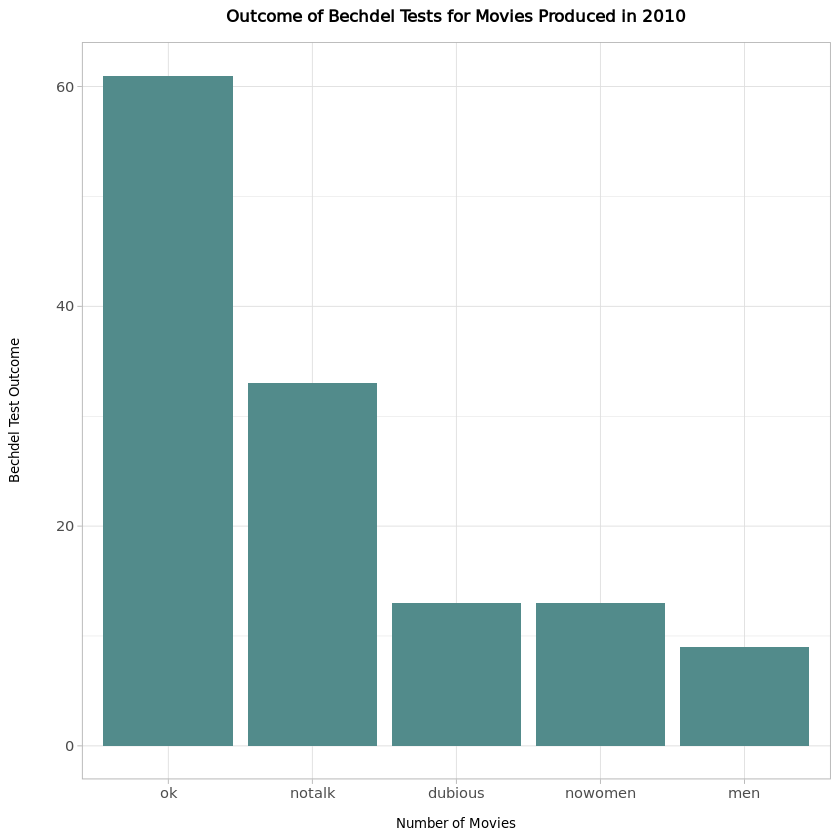

In [8]:
options(repr.plot.red = 100)

p = ggplot(movie_data_filtered, aes(x = outcomes_sorted)) + 
    geom_bar(fill = 'darkslategray4') + theme_light() +
    labs(y = 'Bechdel Test Outcome', x = 'Number of Movies', 
        title = 'Outcome of Bechdel Tests for Movies Produced in 2010') +
    theme(
    plot.title = element_text(face = 'bold', hjust = 0.5, margin = margin(b = 10), size = 10), 
    axis.title.x = element_text(size = 8, margin = margin(t = 10)),
    axis.title.y = element_text(size = 8, margin = margin(r = 20)))

p

From the above graph and *count_data*, we can see that the largest outcome category for movies produced in 2010 is `ok` and that almost half of all movies produced in 2010 passed the Bechdel Test.

**How has the number of movies that receive an** ***okay*** **score changed since 1970 (the earliest year listed in the tibble)?**

In [9]:
movies_that_pass = movie_data |>
    filter(clean_test == 'ok')

movies_that_pass |> head(3)

year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,⋯,director,released,actors,genre,awards,runtime,type,poster,imdb_votes,error
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>
2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,4.5e+07,13414714,40868994,2012PASS,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2013,tt2194499,About Time,ok-disagree,ok,PASS,1.2e+07,15323921,87324746,2013PASS,⋯,Richard Curtis,08 Nov 2013,"Domhnall Gleeson, Rachel McAdams, Bill Nighy, Lydia Wilson","Drama, Fantasy, Romance",1 win & 6 nominations.,123 min,movie,http://ia.media-imdb.com/images/M/MV5BMTA1ODUzMDA3NzFeQTJeQWpwZ15BbWU3MDgxMTYxNTk@._V1_SX300.jpg,85871,NA
2013,tt1814621,Admission,ok,ok,PASS,1.3e+07,18007317,18007317,2013PASS,⋯,Paul Weitz,22 Mar 2013,"Tina Fey, Ann Harada, Ben Levin, Dan Levy","Comedy, Drama, Romance",N/A,107 min,movie,http://ia.media-imdb.com/images/M/MV5BOTE2OTkwNzg5Ml5BMl5BanBnXkFtZTcwOTY0NzQ3OA@@._V1_SX300.jpg,18973,NA


In [10]:
movies_summary = movies_that_pass |>
  group_by(year) |>
  summarise(num_movies = n())

movies_summary |> head(3)

year,num_movies
<dbl>,<int>
1970,1
1972,1
1973,1


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


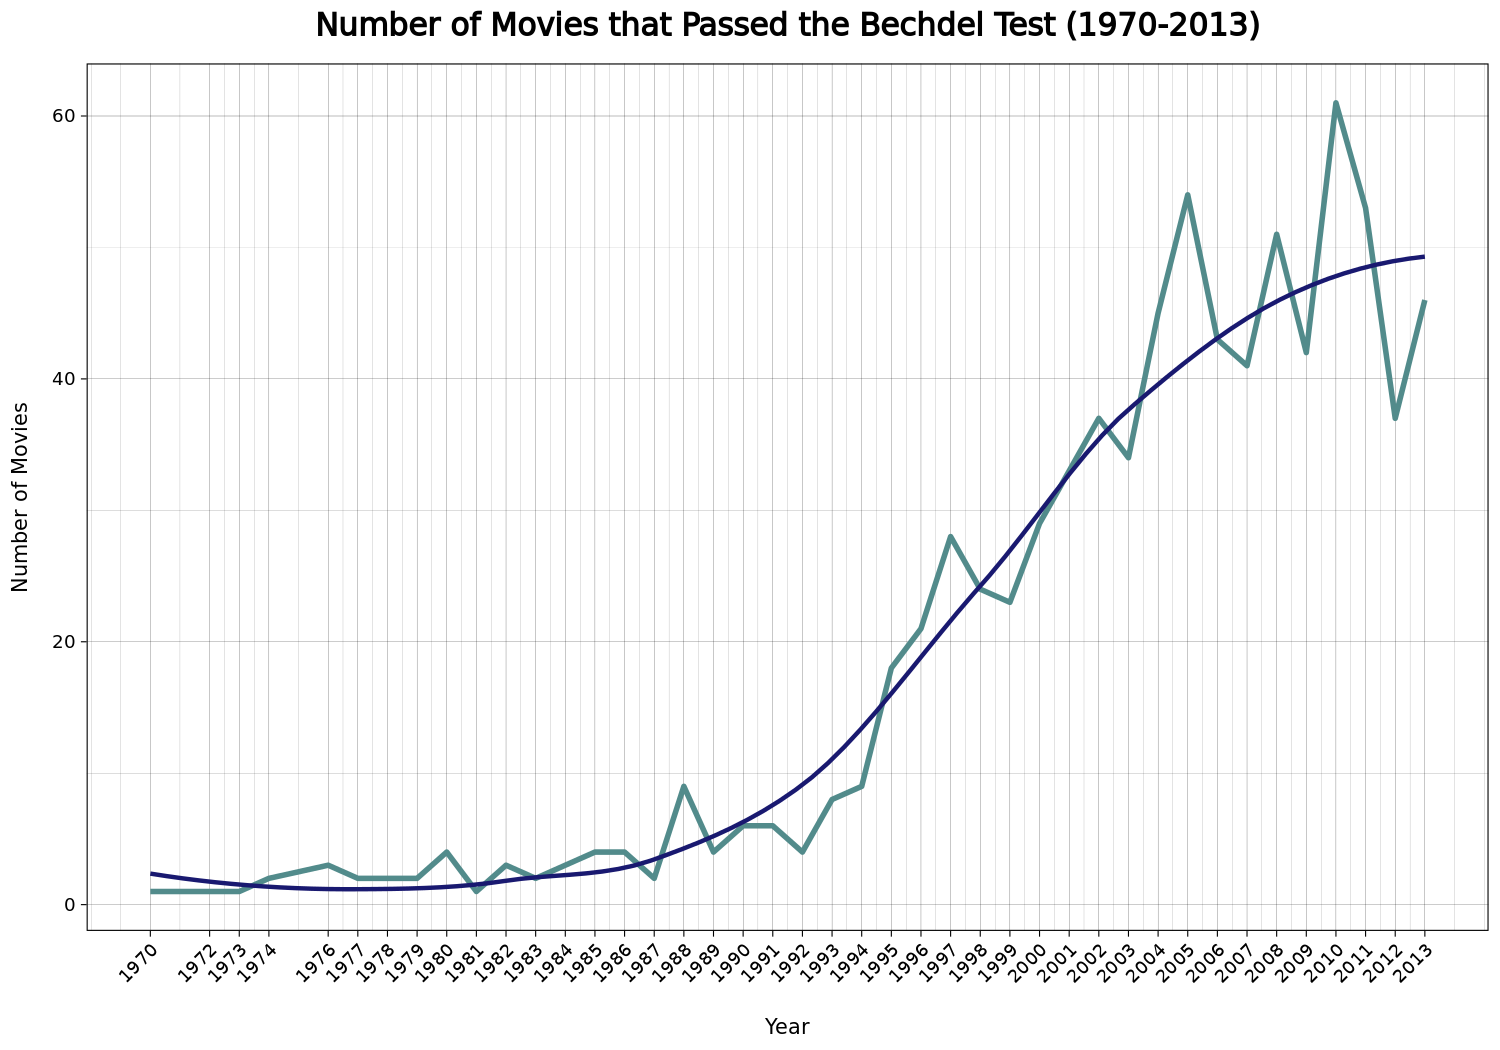

In [11]:
options(repr.plot.res =150, repr.plot.width = 10)

p = ggplot(movies_summary, aes(x = year, y = num_movies)) +
    geom_line(color = 'darkslategray4', linewidth = 1.25) + theme_linedraw() +
    geom_smooth(se = FALSE, color = 'midnightblue') +
    labs(y = 'Number of Movies', 
        x = 'Year', 
        title = 'Number of Movies that Passed the Bechdel Test (1970-2013)') +
    theme(
    plot.title = element_text(face = 'bold', hjust = 0.5, margin = margin(b = 10), size = 15), 
    axis.title.x = element_text(size = 10, margin = margin(t = 15)),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.y = element_text(size = 10, margin = margin(r = 10))) +
    scale_x_continuous(breaks = unique(movies_summary$year))
p

From the linegraph above, we can see that `the number of movies that passed the Bechdel Test has broadly increased since 1970, though the rate of increase was beginning to plateau in 2013.`